In [1]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [5]:
x_train[2345].shape

(28, 28, 1)

In [6]:
from keras.utils import np_utils

In [7]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [18]:
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD, RMSprop, Adam

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(6, (6, 6), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.add(MaxPool2D(pool_size=(2,2)))

In [13]:
model.add(Conv2D(12, (6, 6), padding='same'))
model.add(Activation('relu'))

In [14]:
model.add(MaxPool2D(pool_size=(2,2)))

In [15]:
model.add(Conv2D(24, (6, 6), padding='same'))
model.add(Activation('relu'))

In [16]:
model.add(MaxPool2D(pool_size=(2,2)))

In [17]:
model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [19]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         222       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 12)        2604      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 12)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 12)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 24)          10392     
__________

In [23]:
m_fit = model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 65s 1ms/step - loss: 0.6765 - acc: 0.9567
Epoch 2/20
60000/60000 [==============================] - 66s 1ms/step - loss: 0.6324 - acc: 0.9599
Epoch 3/20
60000/60000 [==============================] - 66s 1ms/step - loss: 0.6744 - acc: 0.9575
Epoch 4/20
60000/60000 [==============================] - 66s 1ms/step - loss: 0.6161 - acc: 0.9612
Epoch 5/20
60000/60000 [==============================] - 83s 1ms/step - loss: 0.6659 - acc: 0.9585
Epoch 6/20
60000/60000 [==============================] - 84s 1ms/step - loss: 0.7011 - acc: 0.9562
Epoch 7/20
60000/60000 [==============================] - 79s 1ms/step - loss: 0.6390 - acc: 0.9602
Epoch 8/20
60000/60000 [==============================] - 85s 1ms/step - loss: 0.6861 - acc: 0.9572
Epoch 9/20
60000/60000 [==============================] - 84s 1ms/step - loss: 0.6816 - acc: 0.9572
Epoch 10/20
60000/60000 [==============================] - 81s 1ms/step - loss: 0.5954 - acc: 0.9628

batch_size太小的話結果都不好

In [24]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 6s 612us/step


In [25]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.6035089865446119
正確率 0.9624


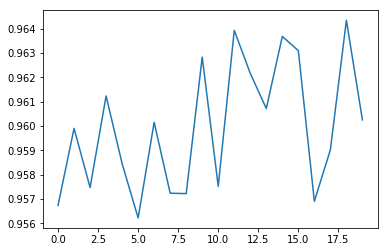

In [26]:
plt.plot(m_fit.history["acc"])

In [27]:
model.save('mnist_CNN.h5')